<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Workshop_3/blob/main/exporting_latent_codes_pca_t_sne_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
"""import json
from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.set_image_data_format('channels_first')
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results"""

"import json\nfrom keras.utils.data_utils import get_file\nfrom keras import backend as K\n\nCLASS_INDEX = None\nCLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'\n\n\ndef preprocess_input(x, dim_ordering='default'):\n    if dim_ordering == 'default':\n        dim_ordering = K.set_image_data_format('channels_first')\n    assert dim_ordering in {'tf', 'th'}\n\n    if dim_ordering == 'th':\n        x[:, 0, :, :] -= 103.939\n        x[:, 1, :, :] -= 116.779\n        x[:, 2, :, :] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, ::-1, :, :]\n    else:\n        x[:, :, :, 0] -= 103.939\n        x[:, :, :, 1] -= 116.779\n        x[:, :, :, 2] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, :, :, ::-1]\n    return x\n\n\ndef decode_predictions(preds, top=5):\n    global CLASS_INDEX\n    if len(preds.shape) != 2 or preds.shape[1] != 1000:\n        raise ValueError('`decode_predictions` expects '\n                         'a batch o

## Import Packages

In [ ]:
import skimage
import cv2
import os
import numpy as np
from sklearn import manifold, datasets
import pickle as pkl

import keras
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg19 import VGG19
from skimage.transform import resize
#import imagenet_utils as imu
from keras.applications import imagenet_utils as imu

import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [ ]:
import cv2 as cv
from glob import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
PATH = '/content/drive/My Drive/Country Pavilions/' #@param{type:'string'}

#images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*.jpg')]
#print(len(images))

In [ ]:
#@title
"""rootfolder = PATH
file_list = os.listdir(rootfolder)
print(file_list)"""

'rootfolder = PATH\nfile_list = os.listdir(rootfolder)\nprint(file_list)'

In [ ]:
#@title
"""file_list_sorted = file_list.sort()
print(file_list_sorted)"""

'file_list_sorted = file_list.sort()\nprint(file_list_sorted)'

In [ ]:
#@title
"""
#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'
file_list = []
for i in range(len(os.listdir(rootfolder))):
  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))

print(file_list)"""

"\n#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'\nfile_list = []\nfor i in range(len(os.listdir(rootfolder))):\n  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))\n\nprint(file_list)"

In [ ]:
#np.array(file_list)

### Preview

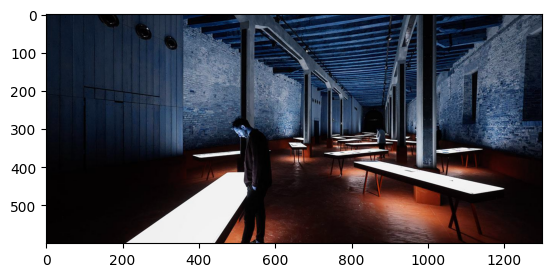

In [ ]:
# Initialise the image stack with the first image
img = cv.imread(PATH + 'argentina-gr_1.jpg') # Mind the naming pattern
#print(img)
plt.imshow(img)

## PCA (principal component analysis)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
import imageio
from skimage import io,transform,color
from skimage import img_as_ubyte
#from sklearn.datasets.base import load_iris
from PIL import Image
import cv2 as cv

In [ ]:
im_stack = []
successful_reads = 0  # Counter for successfully processed images

for i in range(1, num_imgs + 1):
    img = cv.imread(PATH + str(i) + '.jpg')
    if img is not None:
        try:
            # Convert to grayscale
            img_gray = color.rgb2gray(img)

            # Resize the image
            img_gray = cv.resize(img_gray, new_size, interpolation=cv.INTER_AREA)

            # Flatten the image and append it to the stack
            im_stack.append(img_gray.flatten())
            successful_reads += 1  # Increment counter
        except Exception as e:
            print(f"Error processing image {i}: {e}")
    else:
        print(f"Image {i} not found or could not be read.")

# Convert im_stack to a NumPy array
im_stack = np.array(im_stack)
print(f"Successfully processed images: {successful_reads}")


Image 1 not found or could not be read.
Image 2 not found or could not be read.
Image 3 not found or could not be read.
Image 4 not found or could not be read.
Image 5 not found or could not be read.
Image 6 not found or could not be read.
Image 7 not found or could not be read.
Image 8 not found or could not be read.
Image 9 not found or could not be read.
Image 10 not found or could not be read.
Image 11 not found or could not be read.
Image 12 not found or could not be read.
Image 13 not found or could not be read.
Image 14 not found or could not be read.
Image 15 not found or could not be read.
Image 16 not found or could not be read.
Image 17 not found or could not be read.
Image 18 not found or could not be read.
Image 19 not found or could not be read.
Image 20 not found or could not be read.
Image 21 not found or could not be read.
Image 22 not found or could not be read.
Image 23 not found or could not be read.
Image 24 not found or could not be read.
Image 25 not found or cou

In [ ]:
def PCA(matrix, num_components=3):
    # Load the PCA algorithm, set the principal component after dimensionality reduction to num_components
    pca = dp.PCA(n_components=num_components)
    # Dimensionality reduction on raw data
    pca_features = pca.fit_transform(matrix)

    # Print the first two PCA features for brevity
    print(pca_features[0])
    print(pca_features[1])

    # Print PCA features for each image
    for i in range(num_imgs):
        print(f"Image {i+1} PCA features: {pca_features[i]}")

    return pca_features

# Apply PCA to the image stack
low_matrix = PCA(im_stack)


## T-SNE (t-distributed stochastic neighbor embedding)

In [ ]:
import pickle as pkl
import numpy as np
import os
from sklearn import manifold, datasets
import time

_n_dim = 3
_perplexity = 10
_learning_rate = 100
_scale = 1

tsne = manifold.TSNE(n_components=_n_dim, init='pca', random_state=0, perplexity=int(_perplexity), learning_rate=int(_learning_rate))
X_tsne = tsne.fit_transform(low_matrix) # Fit X into an embedded space and return that transformed output.
X_tsne  = X_tsne *_scale
output = X_tsne.tolist()
time=time.time()

for i in range(num_imgs):
    print(output[i])


### Simple Visualisation

In [ ]:
# Plotting the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective (orthographic projection)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker = 'x')
ax.set_proj_type('ortho')  # Setting orthographic projection

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()


In [ ]:
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D

# Compute kernel density estimates for each point in the t-SNE data
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(X_tsne)
densities = kde.score_samples(X_tsne)  # Log density
densities = np.exp(densities)  # Convert log density to actual density
print(densities)

# Scale densities for marker sizes in the plot
density_scale = 10**4  # Scale factor for better visualisation
marker_sizes = densities * density_scale

# Creating the 3D scatter plot with marker sizes based on local kernel density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective, marker sizes based on density
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker='x', s=marker_sizes)

# Setting orthographic projection
ax.set_proj_type('ortho')

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()

In [ ]:
# Adjusting the annotation font size and adding gridlines to the scatter plots

# Re-creating the subplots with smaller font size for annotations and added gridlines
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with smaller font and gridlines
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    ax.scatter(x_data, y_data, marker = 'x')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color = 'lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size

# Component 1 vs Component 2 with annotations
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with annotations
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with annotations
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import gaussian_kde

# Re-creating the subplots with density-based marker sizes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with density-based marker sizes
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    # Calculating the point density
    xy = np.vstack([x_data, y_data])
    scale = 10**6
    z = gaussian_kde(xy)(xy)*scale

    # Scatter plot with density-based marker sizes
    ax.scatter(x_data, y_data, s=z, marker='x', c=z)  # Scaling marker size by density
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color='lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size
    print(z)

# Component 1 vs Component 2 with density-based marker sizes
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


## Save CSV

In [ ]:
# Convert the list to an array
my_array = np.array(output)

# Save the array as a CSV file
f_name = 'Latent_codes_30-nov' #@param{type:'string'}
np.savetxt(f_name + '.csv', my_array, delimiter=',')

## Save Model

In [ ]:
"""
from pathlib import Path
features = np.stack(low_matrix, axis=0)

# rootfolder2 = Path + '_features'
rootfolder2 = '/content/drive/My Drive/'
fileName = os.path.join(rootfolder2,'pca_pool')
fileObject = open(fileName, 'wb')
pkl.dump(features, fileObject)
fileObject.close()
"""